# Consumer Behavior Analytics - Best Model & Interpretability

**Libraries and imports**

In [14]:
# Basic DS libraries
import pandas as pd
import numpy as np

# DataViz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import shap
shap.initjs()

# Statistics Libraries
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Data Utils
from sklearn.metrics import classification_report, confusion_matrix, f1_score, \
                                                                     recall_score, \
                                                                     precision_score, \
                                                                     accuracy_score, \
                                                                     roc_auc_score, \
                                                                     auc, \
                                                                     plot_confusion_matrix, \
                                                                     plot_roc_curve
                                                                         

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier

import joblib
import pickle

# Notebook setup
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

**Let's recover the datasets**

In [15]:
# Loading X_train datasets
X_train = pd.read_csv('../data/tests_sets/X_train-customers_exposed.csv') 
X_train_scaled = pd.read_csv('../data/tests_sets/X_train_scaled-customers_exposed.csv')
y_train = pd.read_csv('../data/tests_sets/y_train-customers_exposed.csv')

# Loading X_val datasets
X_val = pd.read_csv('../data/tests_sets/X_val-customers_exposed.csv')
X_val_scaled = pd.read_csv('../data/tests_sets/X_val_scaled-customers_exposed.csv')
y_val = pd.read_csv('../data/tests_sets/y_val-customers_exposed.csv')

# Loading X_test datasets
X_test = pd.read_csv('../data/tests_sets/X_test-customers_exposed.csv')
X_test_scaled = pd.read_csv('../data/tests_sets/X_test_scaled-customers_exposed.csv')
y_test = pd.read_csv('../data/tests_sets/y_test-customers_exposed.csv')

In [17]:
X_train_scaled.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Family_Size,Income_PerCap,Total_Spent,Prop_Spending_Income_pc,Total_Puchases,Avg_Ticket,Age,Dt_Customer_InDays,Lives_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.552133,-0.003626,0.003124,0.003506,-0.003557,0.002583,0.383671,0.322374,0.410673,0.422851,0.383595,0.597156,0.006330,0.002362,0.002774,-0.207938,0.002370,0.350711,0.233426,-0.006551,0.097814,0.005900,0.126506,0.002754,0.004105,0.003690,0.099526,0.334123,0.232227,0.236967,0.042654
std,0.967836,1.002164,1.002523,1.002255,1.001658,1.001852,0.994852,0.664575,0.904664,0.970794,0.980625,0.945695,0.998504,1.001205,1.000079,0.656940,0.048679,0.945165,0.863789,0.998748,0.685452,0.996677,0.652456,1.002605,1.000700,1.002114,0.299722,0.472243,0.422755,0.425726,0.202316
min,-2.000000,-2.575812,-0.659232,-0.739719,-1.572317,-1.270170,-0.386364,-0.304108,-0.293040,-0.324324,-0.614035,-0.500000,-1.529121,-1.360240,-1.947411,-1.250000,0.000000,-1.000000,-0.937392,-1.371228,-0.927967,-2.257684,-0.782407,-2.333413,-1.591737,-0.778499,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.849568,-0.659232,-0.739719,-0.844293,-0.929106,-0.318182,-0.219497,-0.249084,-0.281081,-0.280702,0.000000,-0.754975,-1.015505,-0.736704,-0.750000,0.000000,0.000000,-0.458632,-0.999403,-0.433873,-0.666112,-0.458915,-0.664440,-0.872151,-0.778499,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.114218,-0.659232,-0.739719,-0.116268,-0.081669,0.000000,-0.002452,0.000000,0.000000,0.000000,0.000000,0.019171,0.018700,-0.131350,0.000000,0.000000,0.000000,-0.017555,-0.002533,-0.004959,0.202018,-0.009169,-0.080300,-0.098991,-0.778499,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.807206,1.396020,1.094438,0.819763,0.776830,0.670455,0.778663,0.747253,0.713514,0.719298,1.000000,0.793317,0.708171,0.776680,0.250000,0.000000,1.000000,0.544799,0.808788,0.558107,0.636083,0.538062,0.837635,0.843411,1.284523,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,2.089271,3.451272,2.928596,1.859798,2.394887,4.000000,2.096873,3.413919,3.870270,3.614035,5.000000,2.341609,2.431846,1.987387,3.500000,1.000000,3.000000,2.762925,2.285901,2.832692,2.372343,1.984080,2.256262,1.788249,1.284523,1.000000,1.000000,1.000000,1.000000,1.000000


**And now load the best model**

In [18]:
log_model = joblib.load('../models/v2_pkl_cexposed_Logistic_Regression-Baseline.pkl')

In [19]:
# Saving y_val_pred into a new variable to compare metrics in classification report
y_val_pred = log_model.predict(X_val_scaled)

In [20]:
# Viewing classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        39
           1       0.81      0.79      0.80        58

    accuracy                           0.76        97
   macro avg       0.75      0.76      0.75        97
weighted avg       0.76      0.76      0.76        97



## Feature Importance Analysis

In [110]:
# Getting SHAP values
explainer = shap.Explainer(log_model.best_estimator_, X_train_scaled)
shap_values = explainer(X_train_scaled)

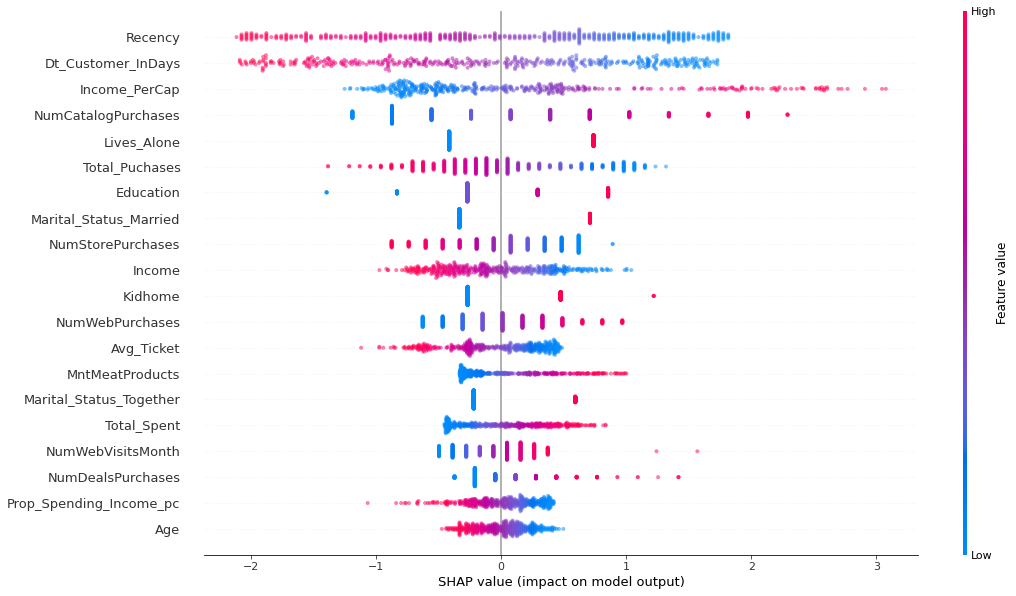

In [111]:
# Plotting Feature Importance graph
shap.summary_plot(shap_values.values, 
                  X_train_scaled, 
                  plot_size = (16, 10), 
                  alpha = .5)

**Let's investigate some customers in details**

In [112]:
explainer.feature_names

In [113]:
shap.force_plot(explainer.expected_value, 
                shap_values.values[:100], 
                X_test_scaled.loc[:100, :])

---------------------

In [114]:
# shap.dependence_plot('MntMeatProducts', shap_values.values, X_train_scaled, interaction_index = 'Age')

In [ ]:
############## DRAFTS

In [ ]:
# rfc_model = joblib.load('../models/v2_pkl_cexposed_RandomForestClassifier.pkl')

In [ ]:
# explainer = shap.TreeExplainer(rfc_model.best_estimator_)

# shap_values = explainer.shap_values(X_train, y = y_train)

In [ ]:
# shap.summary_plot(shap_values[1], X_train)

In [ ]:
# # rfc_model = pickle.load('../models/pkl_cexposed_RandomForestClassifier.pkl')
# # rfc_model

# file = open("../models/pkl_cexposed_RandomForestClassifier.pkl",'rb')
# rfc_model = pickle.load(file)

# file2 = open("../models/pkl_cexposed_GradientBoostingClassifier.pkl",'rb')
# gradboost_model = pickle.load(file2)

In [ ]:
# # Create the list of all labels for the drop down list
# list_of_labels = X_train.columns.to_list()

# # Create a list of tuples so that the index of the label is what is returned
# tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# # Create a widget for the labels and then display the widget
# current_label = widgets.Dropdown(options=tuple_of_labels,
#                               value=0,
#                               description='Select Label:'
#                               )

# # Display the dropdown list (Note: access index value with 'current_label.value')
# current_label

In [ ]:
# shap.summary_plot(shap_values[:, 1], df_train_full[df_train_full['Response'] == 1].drop('Response', axis = 1).sample(50, random_state = 7))

In [ ]:
# df_train_full = pd.concat([X_train, y_train], axis = 1)
# df_train_full[df_train_full['Response'] == 1].drop('Response', axis = 1).head()